In [63]:
import os
import pandas as pd
import numpy as np
import os
import psycopg2 
from dotenv import load_dotenv 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.dates as mdates
from sklearn.preprocessing import MaxAbsScaler

In [64]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [66]:
import pandas as pd

seven_day_plots_all = pd.read_csv("1st_7th_march_results_all.csv")
final_mse_all = pd.read_csv("final_MSEs.csv")


# Plotting final mse for all models

In [67]:
final_mse_all.set_index('site', inplace=True)
final_mse_all 

,gru_mse,lstm_mse,rf_mse,arimax_mse,average_mse_per_site
site,,,,,
2,0.016795,0.016070,0.0146,0.0170,0.016116
3,0.019325,0.024114,0.0211,0.0225,0.021760
6,0.021473,0.023208,0.0189,0.0427,0.026570
9,0.019201,0.021545,0.0266,0.0283,0.023911
11,0.018786,0.017435,0.0147,0.0118,0.015680
12,0.005084,0.003483,0.0066,0.0038,0.004742
16,0.033665,0.035975,0.0406,0.0774,0.046910
17,0.008330,0.008220,0.0101,0.0087,0.008838
20,0.019581,0.018185,0.0160,0.0243,0.019517


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set2")
hex_colors = sns.color_palette("Set2", 8).as_hex()

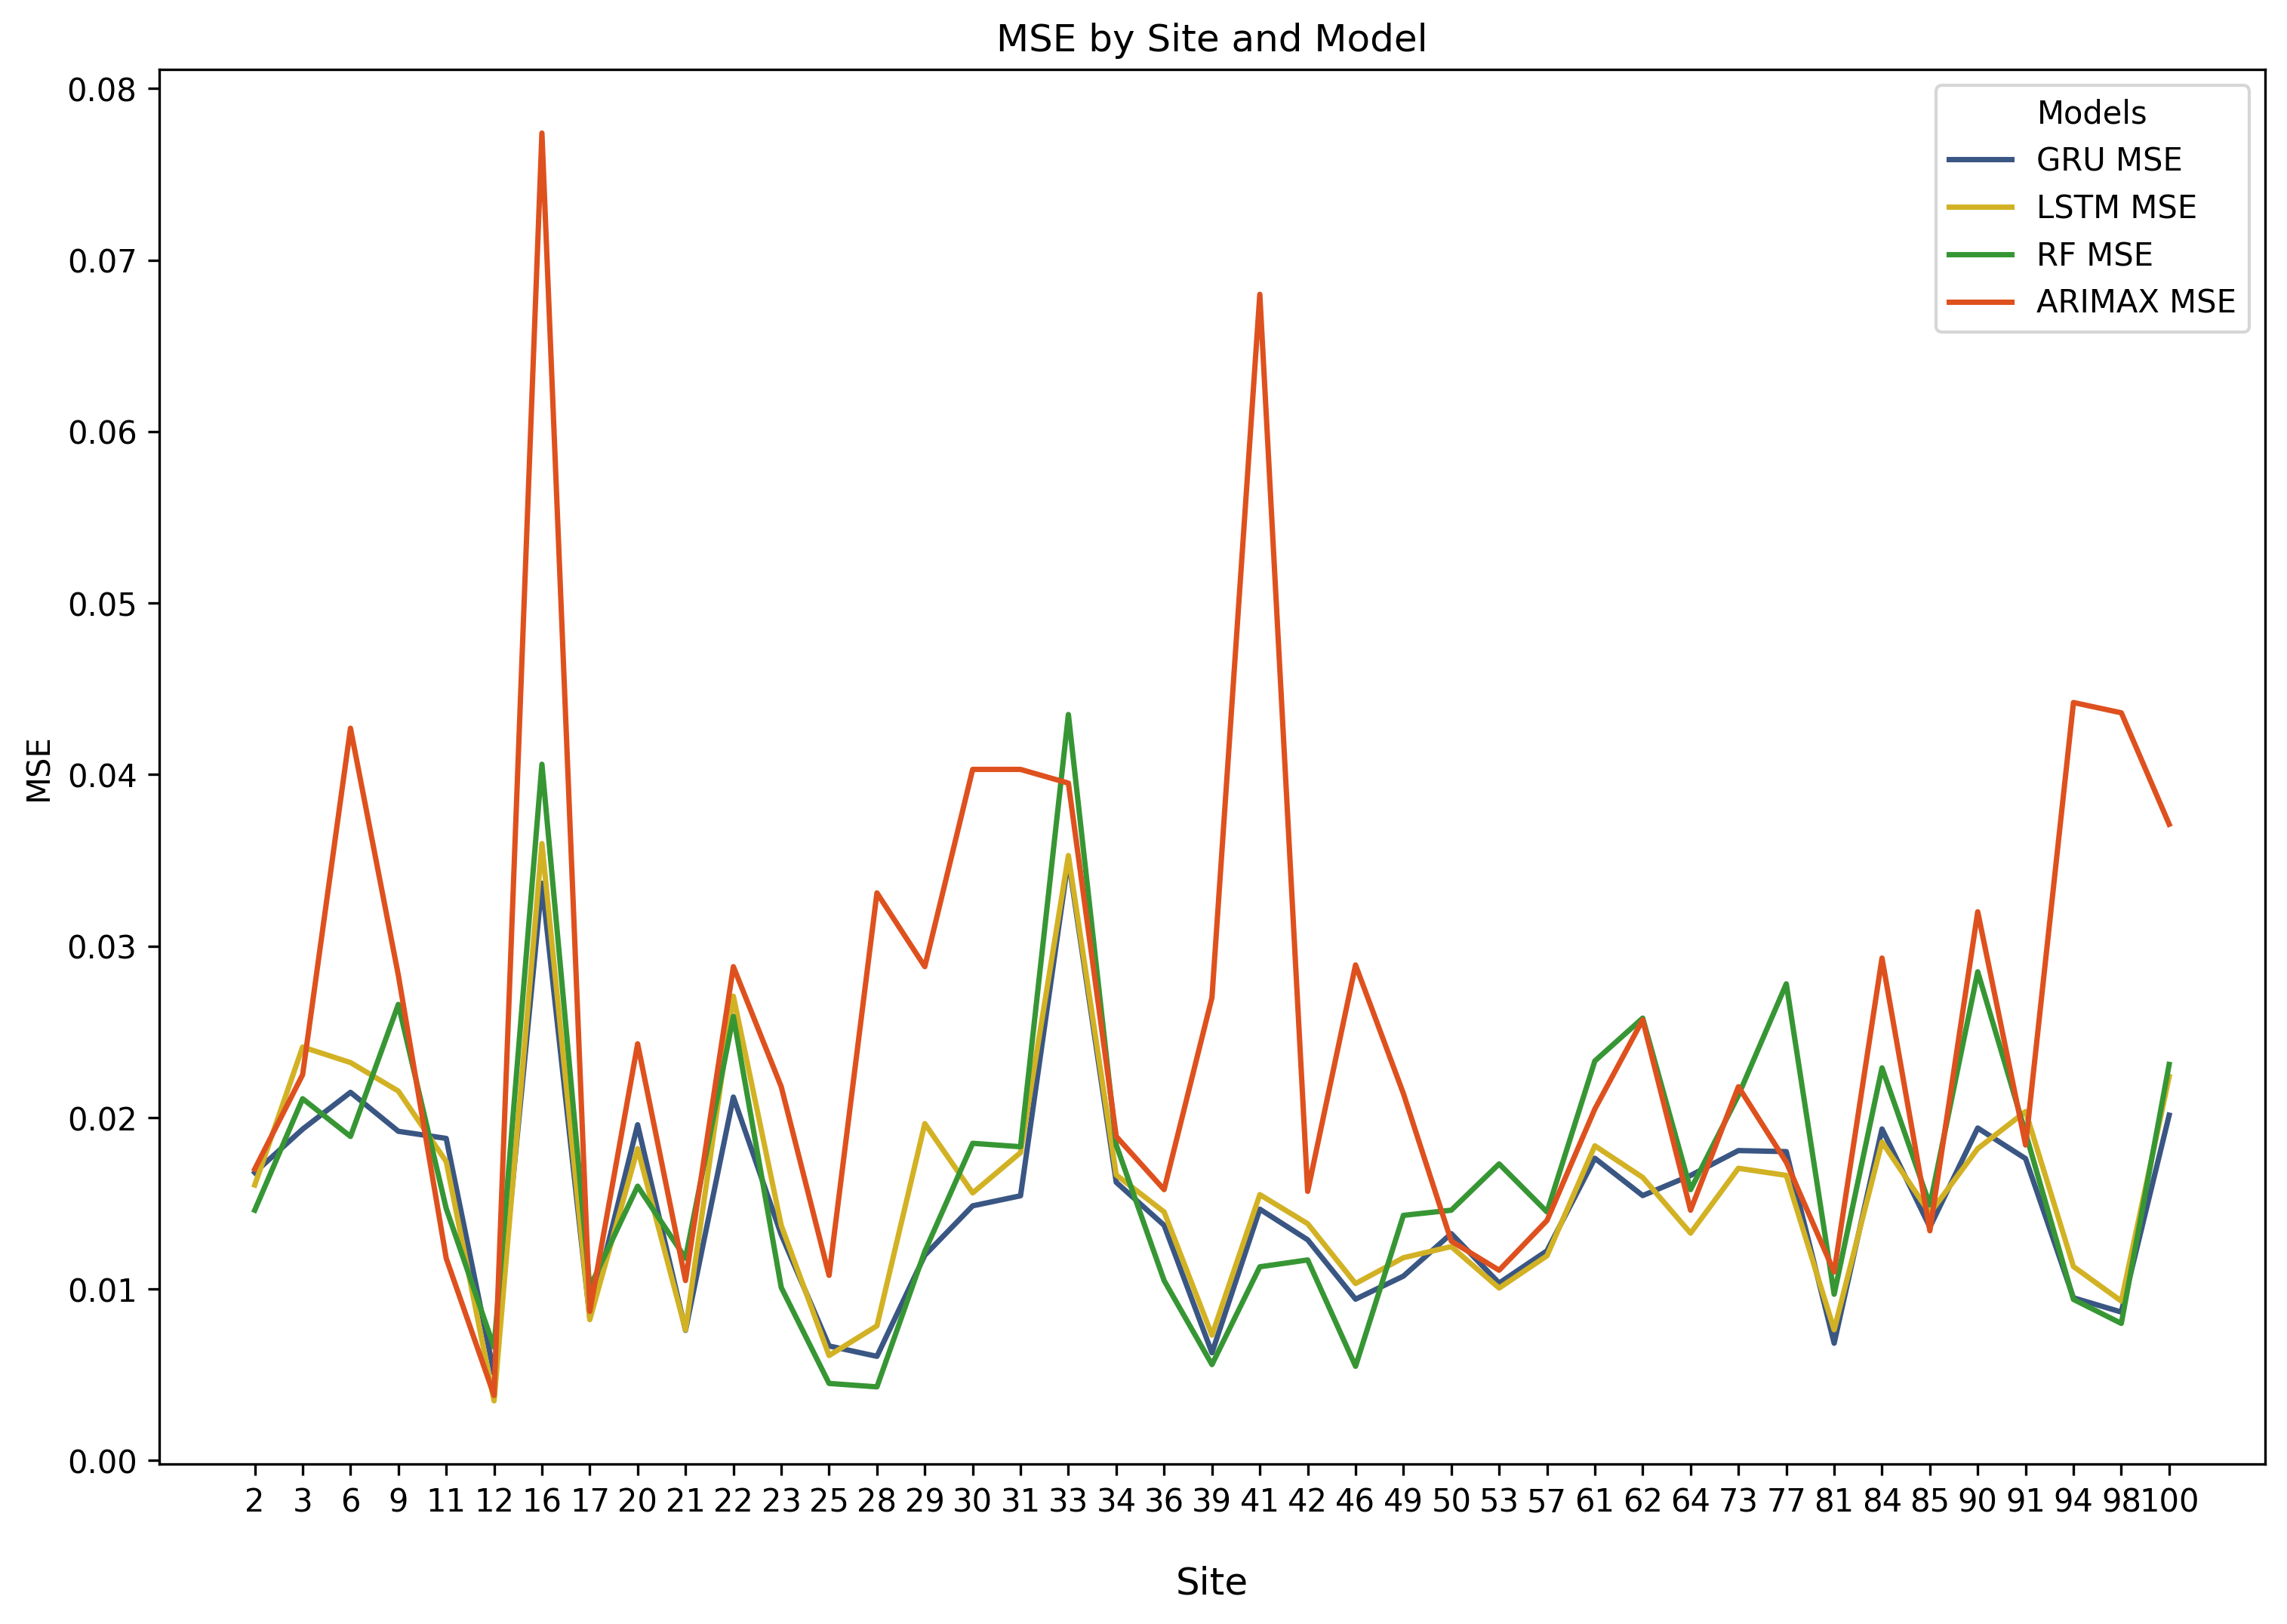

In [69]:
plt.figure(figsize=(12, 8), dpi=300)

final_mse_all.index = final_mse_all.index.map(str)

# Plot MSE metrics
plt.plot(final_mse_all.index, final_mse_all['gru_mse'], label='GRU MSE', color='#3A5683', linewidth=1.7)
plt.plot(final_mse_all.index, final_mse_all['lstm_mse'], label='LSTM MSE', color='#D2B224', linewidth=1.7)
plt.plot(final_mse_all.index, final_mse_all['rf_mse'], label='RF MSE', color='#379634', linewidth=1.7)
plt.plot(final_mse_all.index, final_mse_all['arimax_mse'], label='ARIMAX MSE', color='#DE511E', linewidth=1.7)

plt.xlabel('Site', labelpad=15, fontsize=12)
plt.ylabel('MSE')
plt.title('MSE by Site and Model')

plt.legend(title='Models', fontsize=10, title_fontsize=10)

plt.show()

## Setting ts as index for plotting

In [70]:
seven_day_plots_all.set_index('ts', inplace=True)
seven_day_plots_all.sort_index(inplace=True)
seven_day_plots_all.head()

,atcual_net_load_norm,RF_pred,ARIMAX_pred,LSTM_pred,GRU_pred,net_diff_RF,net_diff_ARIMAX,net_diff_LSTM,net_diff_GRU
ts,,,,,,,,,
2020-03-01 00:00:00+00:00,0.144937,0.170669,0.089987,0.162528,0.206903,0.025733,0.054950,0.017592,0.061966
2020-03-01 00:30:00+00:00,0.139616,0.165562,0.083148,0.178559,0.182361,0.025947,0.056468,0.038943,0.042746
2020-03-01 01:00:00+00:00,0.168242,0.173472,0.083269,0.162007,0.182518,0.005230,0.084973,0.006235,0.014277
2020-03-01 01:30:00+00:00,0.133450,0.179963,0.083362,0.172721,0.207759,0.046513,0.050088,0.039271,0.074308
2020-03-01 02:00:00+00:00,0.170335,0.165454,0.086696,0.175944,0.213783,0.004881,0.083639,0.005609,0.043449


In [71]:
seven_day_plots_all.index = pd.to_datetime(seven_day_plots_all.index)

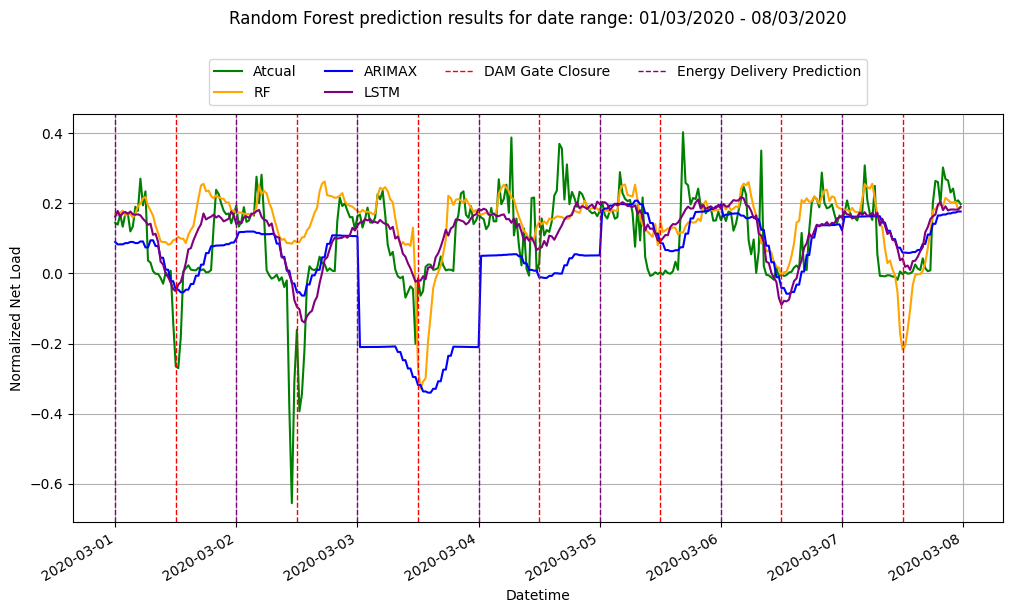

In [72]:
start_date = '2020-03-01'
end_date = '2020-03-07'

plt.figure(figsize=(12, 6))
plt.plot(seven_day_plots_all.index, seven_day_plots_all["atcual_net_load_norm"], label='Atcual', color='green', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["RF_pred"], label='RF', color='orange', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["ARIMAX_pred"], label='ARIMAX', color='blue', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["LSTM_pred"], label='LSTM', color='purple', linewidth=1.5)

for day in pd.date_range(start=start_date, end=end_date):
    dam_closure_time = pd.Timestamp(day.strftime('%Y-%m-%d 12:00'))
    energy_delivery_time = pd.Timestamp(day.strftime('%Y-%m-%d 00:00'))
    plt.axvline(x=dam_closure_time, color='red', linestyle='--', linewidth=1, label='DAM Gate Closure' if day == pd.Timestamp(start_date) else "")
    plt.axvline(x=energy_delivery_time, color='purple', linestyle='--', linewidth=1, label='Energy Delivery Prediction' if day == pd.Timestamp(start_date) else "")

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid(visible=True)
plt.title('Random Forest prediction results for date range: 01/03/2020 - 08/03/2020', y=1.20)
plt.xlabel('Datetime')
plt.ylabel('Normalized Net Load')

plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.15))

plt.show()

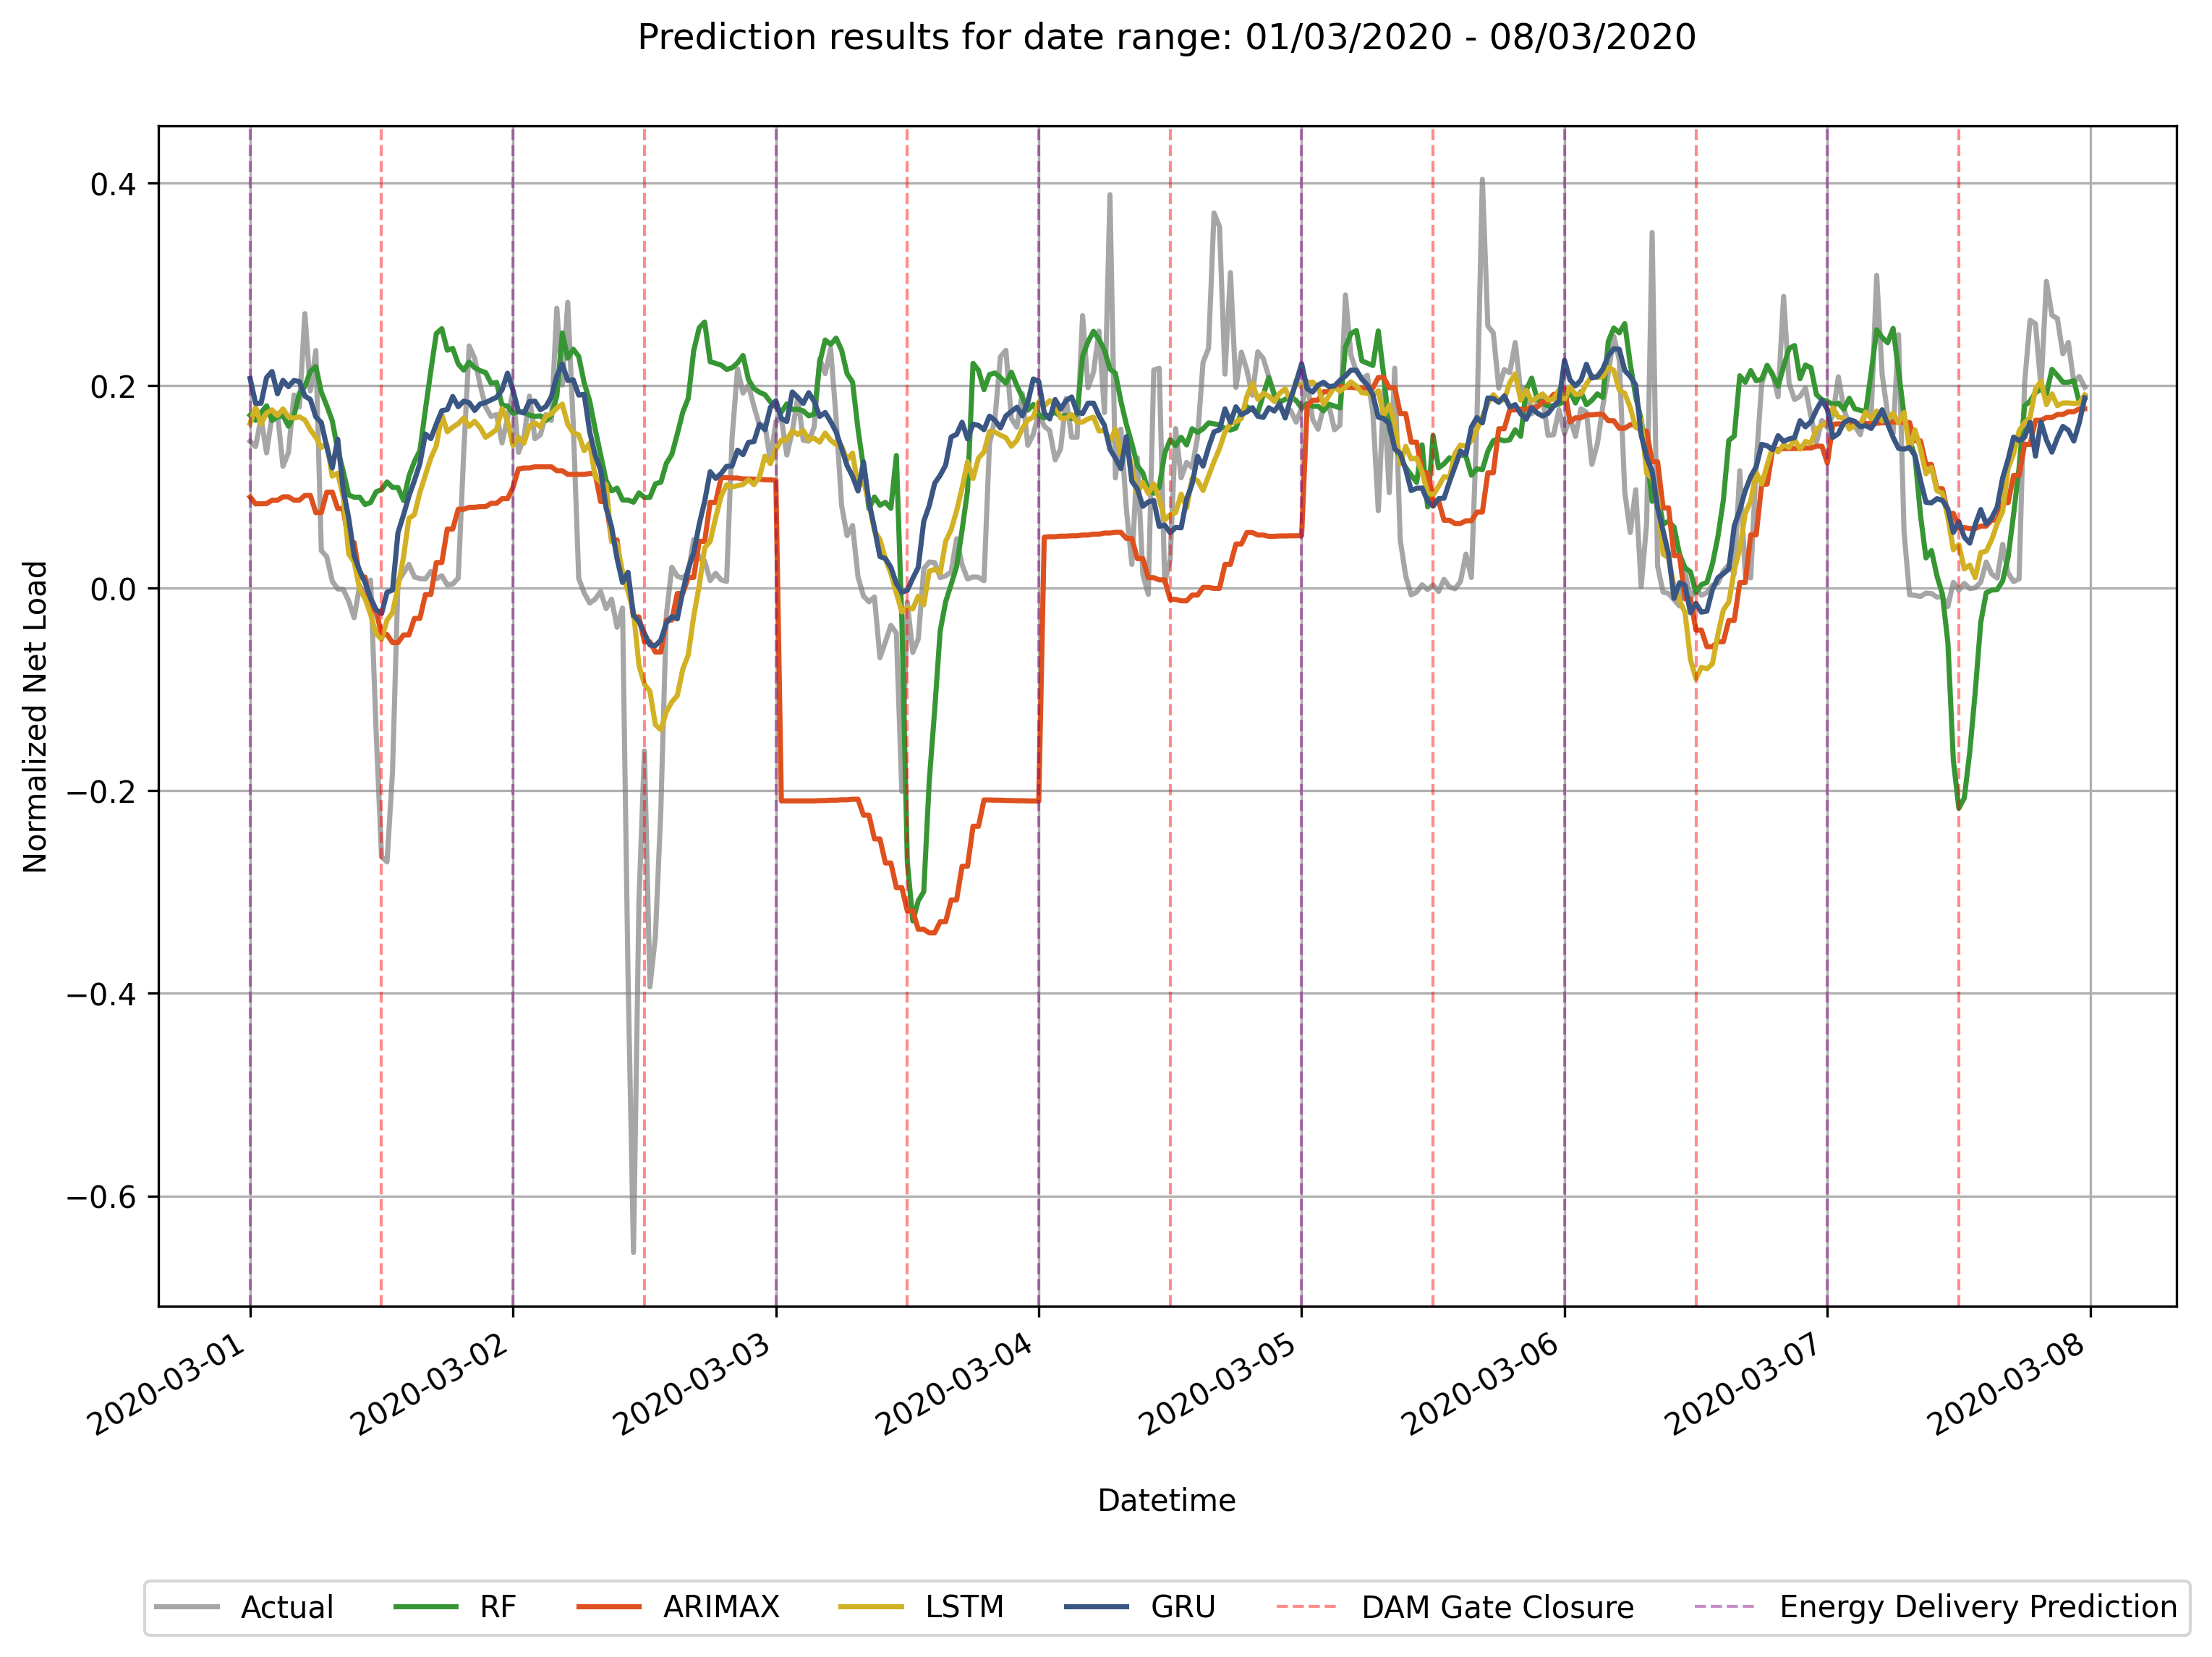

In [73]:
start_date = '2020-03-01'
end_date = '2020-03-07'

# Define the date format for the x-axis
plt.figure(figsize=(12, 8), dpi=300)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["atcual_net_load_norm"], label='Actual', color='grey', alpha=0.7 , linewidth=1.7)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["RF_pred"], label='RF', color='#379634', linewidth=1.7)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["ARIMAX_pred"], label='ARIMAX', color='#DE511E', linewidth=1.7)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["LSTM_pred"], label='LSTM', color='#D2B224', linewidth=1.7)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["GRU_pred"], label='GRU', color='#3A5683', linewidth=1.7)

for day in pd.date_range(start=start_date, end=end_date):
    dam_closure_time = pd.Timestamp(day.strftime('%Y-%m-%d 12:00'))
    energy_delivery_time = pd.Timestamp(day.strftime('%Y-%m-%d 00:00'))
    plt.axvline(x=dam_closure_time, color='red', alpha = 0.45, linestyle='--', linewidth=1, label='DAM Gate Closure' if day == pd.Timestamp(start_date) else "")
    plt.axvline(x=energy_delivery_time, color='purple', alpha = 0.45, linestyle='--', linewidth=1, label='Energy Delivery Prediction' if day == pd.Timestamp(start_date) else "")


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1, 9)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(plt.NullLocator())

plt.gcf().autofmt_xdate()

plt.grid(visible=True)
plt.xlabel('Datetime', labelpad=15, y=1.05)
plt.ylabel('Normalized Net Load')
plt.title('Prediction results for date range: 01/03/2020 - 08/03/2020', y=1.05)
plt.legend(ncol=7, loc='upper center', bbox_to_anchor=(0.5, -0.22))


plt.show()